# Machine Learning: Final Project

### Predicting Survival on the *Titanic*

The final project is intended to simulate participation in a Kaggle competition. Your challenge is to build the most accurate model for predicting which passangers would survive the sinking of the *Titanic*. The ***Titanic Machine Learning Final Project.ipynb*** Colab notebook provides some guidance for tackling the project and suggests some things to think about as you get started. However, many of the model-building decisions are left up to you.
**Note**: Use comments in your code and text blocks to explain your decisions and results.

### Build a Pipeline for a Kaggle Competition!

Kaggle was started in 2010 as a platform for machine learning competitions, which aim to identify how best to optimize supervised learning problems. These initiatives offer a two-way benefit. They help companies improve their internal algorithms and they provide prospective data professionals opportunities to prove their worth.

Though Kaggle usually has a singular aim of maximizing a specific metric, the idea of finding the best possible algorithm and furthermore optimizing its hyperparameters is the daily task of a data scientist. Moreover, success in Kaggle can be great for a future resume (since your information is saved on their site).

Obviously, the timeframe for this lesson is not realistic in terms of a typical Kaggle workflow, as competitors spend weeks or even months optimizing every piece of an algorithm they can. However, you can get started with preliminary testing and use these principles to enter your own Kaggle competitions in the future!

# Step 1: Importing Libraries

It is best practice to import all libraries and packages early in the process.

You'll probably want to import Pandas plus some packages from scikit-learn.

| Type | Path | Regression | Classification |
| --- | --- | --- | --- |
| **Linear Models** | `sklearn.linear_model` | `LinearRegression` | `LogisticRegression` |
|  |  |`Ridge` | `RidgeClassifier` |
|  |  |`Lasso` |  |
| **K Nearest Neighbors** | `sklearn.neighbors` | `KNeighborsRegressor` | `KNeighborsClassifier` |
| **Support Vector Machines** | `sklearn.svm.` | `SVR` | `SVC` |
| **Naive Bayes** |  `sklearn.naive_Bayes` |  |`CategoricalNB` (Categorical) |
|  |  |  | `MultinomialNB` (Sentiment Analysis) |
| **Decision Trees** | `sklearn.tree` | `DecisionTreeRegressor` | `DecisionTreeClassifier` |
| **Ensemble - Random Forests** | `sklearn.ensemble` | `RandomForestRegressor` | `RandomForestClassifier`
| **Ensemble - Boosting** | `sklearn.ensemble` | `AdaBoostRegressor` | `AdaBoostClassifier` |
|  | `sklearn.ensemble` | `GradientBoostRegressor` | `GradientBoostClassifier` |



| Type | Path | Package |
| --- | --- | --- |
| Preprocessing | `sklearn.preprocessing` | `StandardScaler` |
| |`sklearn.preprocessing` | `MinMaxScaler` |
| |`sklearn.preprocessing` | `MaxAbsScaler` |
| Model Selection - Splitting| `sklearn.model_selection` | `train_test_split` |
| Model Selection - Grid Search | `sklearn.model_selection` | `GridSearchCV` |
| Model Selection - Scoring | `sklearn.model_selection` | `cross_val_score` |
| Metrics | `sklearn.metrics` | `confusion_matrix` |


**Note**: Use comments in your code and text blocks to explain your decisions and results.




In [ ]:
# I'm importing all the necessary libraries except for Categorical and Multinomial Naive-Bayesian
# Classification and Grid Search to optimize the model as much as I could, based on my current experience
# with machine learning.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.inspection import permutation_importance

#Step 2:  Load the `Titanic.csv` Data
You may want to refer back to one of your previous Colab notebooks to copy the Google Import code.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
#Step 2

from google.colab import files
segmentation=files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
#I can't just continue without looking at the data beforehand.

titanic=pd.read_csv('Titanic.csv')
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.shape

(891, 12)

#Step 3: Split the Data

The next step is to separate the target column from the feature matrix and perform a train/test split.

*   What is the target and what are the features in the data?
*   Are there any features that you want to drop?
*   Is there any feature engineering that you need to do?

**Note**: Use comments in your code and text blocks to explain your decisions and results.



#### I need descriptions of each feature/column to see which features should I use and to see if I should encode anything.

In [ ]:
titanic['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
titanic['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [ ]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
titanic['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
titanic['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [ ]:
titanic['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

#### Step 3

In [ ]:
#Step 3

# My target is the 'Survived' column and the features are 'Pclass','Sex','Parch', and 'Age'.
# 'Sex' needs to have its values changed to numbers.
# 'PassengerId', 'Name', 'Cabin', and 'Ticket' are dropped because they have too many unique values.
# 'Embarked' is not considered to further increase the accuracy.

X=titanic[['Pclass','Sex','Parch','Age','SibSp', 'Fare']]
y=titanic[['Survived']]

X.loc[X['Sex'] == 'male', 'Sex'] = 1 #No matter what number I pick, the highest accuracy doesn't change.
X.loc[X['Sex'] == 'female', 'Sex'] = 0

/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


#Step 4: Clean and Preprocess the Data

Use the code block below to clean and preprocess your data. Some considerations you may want to think about include the following:  
*  Are there any missing values that need to be imputed?
*  Do you need to encode any categorical features?
*  Do you need to standardize any quantitative features?

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [ ]:
#Step 4

# There are missing values to impute.
# 'Sex' needs to have its values changed to numbers.
# I Standardized quantitative features with StandardScaler. MinMaxScaler, and MaxAbsScaler.

X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.333,random_state=42)

X_train_val,X_test,y_train_val,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train_val,y_train_val,test_size=0.333,random_state=42)

#### Checking for null values.

In [ ]:
X_train.isna().sum()

Pclass     0
Sex        0
Parch      0
Age       86
SibSp      0
Fare       0
dtype: int64

In [ ]:
y_train.isna().sum()

Survived    0
dtype: int64

In [ ]:
X_test.isna().sum()

Pclass     0
Sex        0
Parch      0
Age       45
SibSp      0
Fare       0
dtype: int64

In [ ]:
y_test.isna().sum()

Survived    0
dtype: int64

#### Imputing missing data.

In [ ]:
imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
X_train_=imp_mean.fit_transform(X_train)
X_train=pd.DataFrame(X_train_)

imp_mean=SimpleImputer(missing_values=np.nan,strategy='mean')
y_train_=imp_mean.fit_transform(y_train)
y_train=pd.DataFrame(y_train_)

#Step 5: Build the Baseline Model

Ideally, you will want to set a baseline algorithm to build off of. The most logical start is *linear regression* for *regression* and *logistic regression* for *classification*, as they are the basis for their respective algorithms.

Once you have the baseline set, you will want to choose an algorithm that surpasses the baseline.

Select a baseline model and fit it to your data.

**Note**: Use comments in your code and text blocks to explain your decisions and results.



In [ ]:
# Step 5

#I chose Logistic Regression because it is a Supervised Classification algorithm.
pipe_LogReg=Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
('scaler',StandardScaler()),
('log_reg',LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=1))])
pipe_LogReg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=1, random_state=0, solver='liblinear'))])

#Step 6: Evaluate the Baseline Model

Use cross-validation to calculate the appropriate model evaluation metric.

Is your model doing a good job fitting the data?  

If you have ideas for how to improve your model fit, go back and make those changes to earlier steps.

**Note**: Use comments in your code and text blocks to explain your decisions and results.


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

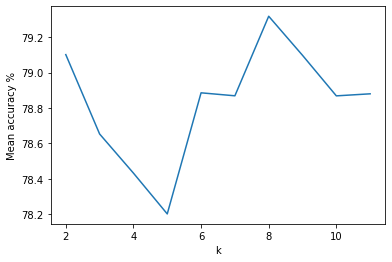

In [ ]:
#Step 6

#This model is nearly 80% accurate; this model usually predicts survival correctly, but it's not very reliable.
#I wasn't able to improve the results despite the changes I've made.

k = list(range(2,12))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_LogReg, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
pipe_l1=Pipeline([('scaler', StandardScaler()),
                      ('log_reg', LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=1))])
pipe_l1.fit(X_train, y_train)
l1_scores = cross_val_score(pipe_l1, X_train, y_train, cv=8)
l1_cv_accuracy = l1_scores.mean()
print(l1_cv_accuracy)

0.7931818181818182


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [ ]:
log_reg = LogisticRegression(random_state=0)
log_reg_model = log_reg.fit(X_train, y_train)

probs_=log_reg_model.predict_proba(X_train)
probs=pd.DataFrame(probs_)

classes_=log_reg_model.predict(X_train)
classes=pd.DataFrame(classes_)

confusion_matrix(y_train, classes)

print("Precision score is",precision_score(y_train, classes))
print("Recall score is",recall_score(y_train, classes))

Precision score is 0.7484276729559748
Recall score is 0.695906432748538


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Step 7: Fit the Data to at Least One Other Model

Select one (or more) other appropriate model and use it to model the data. Calculate the cross-validation accuracy of each model.

**Note**: Use comments in your code and text blocks to explain your decisions and results.

#### K-Nearest Neighbors

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

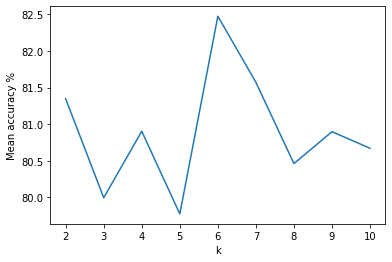

In [ ]:
#Step 7

# I got rid of 'SibSp' and 'Fare' to increase the accuracy (being 4 and 5 from X_train).
X_trainK=X_train.drop([4,5], axis=1)

pipe_KNN = Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler',MinMaxScaler()),
                     ('KNN', KNeighborsClassifier(n_neighbors=4))])
pipe_KNN.fit(X_trainK,y_train)

k = list(range(2,11))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_KNN, X_trainK, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

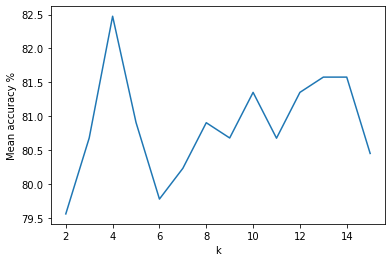

In [ ]:
k = list(range(2,16))
mean_accuracy = []

for i in k:
  pipe_KNN= Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                       ('scaler', MinMaxScaler()),
                     ('KNN', KNeighborsClassifier(n_neighbors=i))])

  pipe_KNN.fit(X_trainK, y_train)
  scores = cross_val_score(pipe_KNN, X_trainK, y_train, cv=6)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
pipe_KNN= Pipeline([('imp_mean',SimpleImputer(missing_values=np.nan, strategy='mean')),
                    ('scaler', MinMaxScaler()),
                    ('KNN', KNeighborsClassifier(n_neighbors=4))])

pipe_KNN.fit(X_train, y_train)
HIGH_score = cross_val_score(pipe_KNN, X_trainK, y_train, cv=6)
print("Highest accuracy for K-Nearest Neighbors",HIGH_score.mean())

Highest accuracy for K-Nearest Neighbors 0.8247447447447446


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

#### Support Vector Classifiers

##### Linear SVC

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

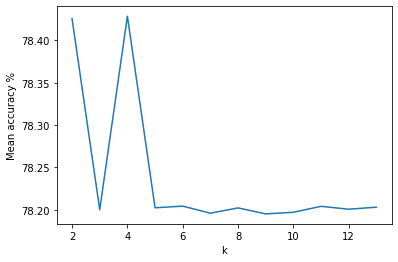

In [ ]:
pipe_svcLinear = Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
  ('scaler',StandardScaler()),
  ('SVC_Linear',SVC(kernel='linear'))])
pipe_svcLinear.fit(X_train,y_train)

k = list(range(2,14))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_svcLinear, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

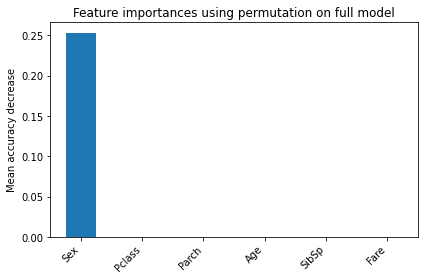

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipe_svcLinear.named_steps['SVC_Linear'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_svcLinear, X_train, y_train, cv=4)
print("Highest accuracy for Linear SVC",HIGH_score.mean())

Highest accuracy for Linear SVC 0.7842865186615187


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

##### Polynomial SVC

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

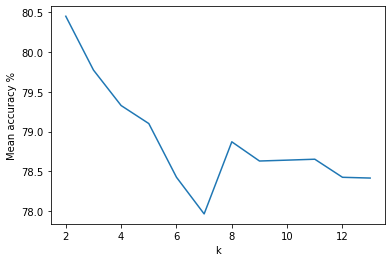

In [ ]:
pipe_svcPoly = Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
  ('scaler',MaxAbsScaler()),
  ('SVC_Polynomial',SVC(kernel='poly'))])
pipe_svcPoly.fit(X_train,y_train)

k = list(range(2,14))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_svcPoly, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

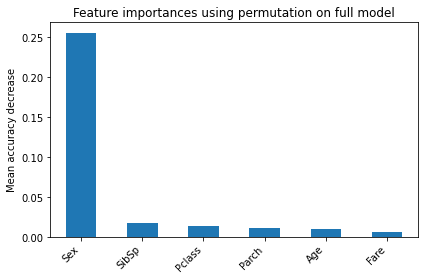

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = MaxAbsScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipe_svcPoly.named_steps['SVC_Polynomial'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_svcPoly, X_train, y_train, cv=2)
print("Highest accuracy for Polynomial SVC",HIGH_score.mean())

Highest accuracy for Polynomial SVC 0.8044984446329737


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Radial SVC

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

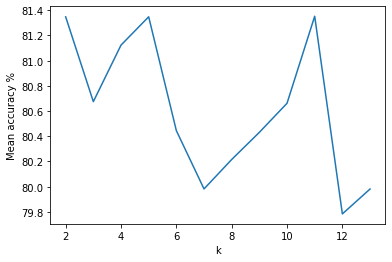

In [ ]:
pipe_svcRadial = Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
  ('scaler',StandardScaler()),
  ('SVC_RadialBasisFunction',SVC(kernel='rbf'))])
pipe_svcRadial.fit(X_train,y_train)

k = list(range(2,14))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_svcRadial, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

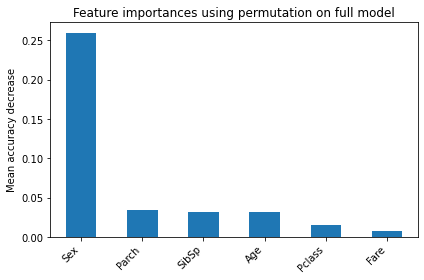

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipe_svcRadial.named_steps['SVC_RadialBasisFunction'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_svcRadial, X_train, y_train, cv=11)
print("Highest accuracy for Radial SVC",HIGH_score.mean())

Highest accuracy for Radial SVC 0.8135254988913526


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

#### Naive-Bayes Classifiers

##### Gaussian Naive-Bayes

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

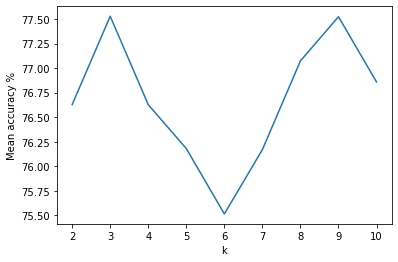

In [ ]:
pipeGaussNB=Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
('scaler',StandardScaler()),
('Gaussian_N_B',GaussianNB())])
pipeGaussNB.fit(X_train,y_train)

k = list(range(2,11))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipeGaussNB, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

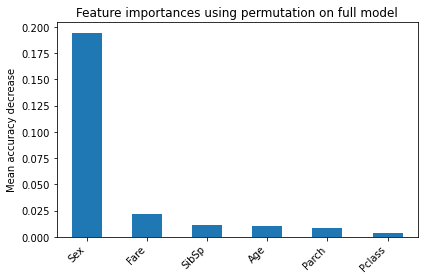

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipeGaussNB.named_steps['Gaussian_N_B'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipeGaussNB, X_train, y_train, cv=3)
print("Highest accuracy for Gradient Naive-Bayes Classifier",HIGH_score.mean())

Highest accuracy for Gradient Naive-Bayes Classifier 0.7752887115303223


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Decision Trees

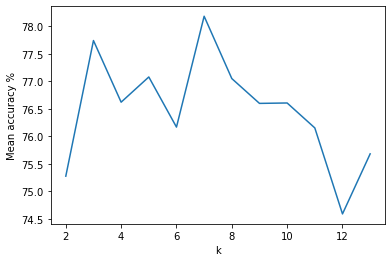

In [ ]:
pipe_DecisionTree=Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
('scaler',MaxAbsScaler()),
('Decision_Tree', DecisionTreeClassifier(criterion='gini',random_state=42))])
pipe_DecisionTree.fit(X_train,y_train)

k = list(range(2,14))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_DecisionTree, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_DecisionTree, X_train, y_train, cv=7)
print("Highest accuracy for Random Forests",HIGH_score.mean())

Highest accuracy for Random Forests 0.7818168934240363


#### Random Forests

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

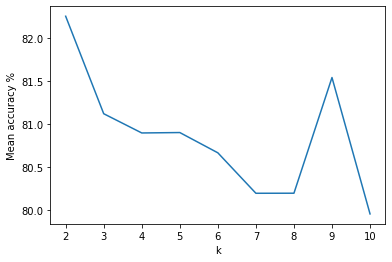

In [ ]:
# May take some time.

pipe_RandomForest=Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
('scaler',MaxAbsScaler()),
('Random_Forest', RandomForestClassifier(random_state=42))])
pipe_RandomForest.fit(X_train,y_train)

k = list(range(2,11))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_RandomForest, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

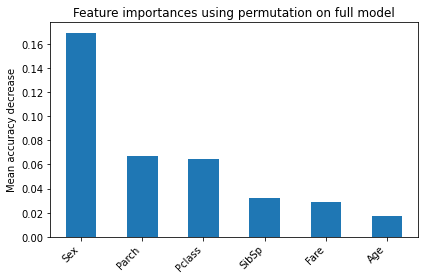

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipe_RandomForest.named_steps['Random_Forest'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_RandomForest, X_train, y_train, cv=2)
print("Highest accuracy for Random Forests",HIGH_score.mean())
#0.8224760635074537

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Highest accuracy for Random Forests 0.8224861632933382


#### Boosting

##### Gradient Boost

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

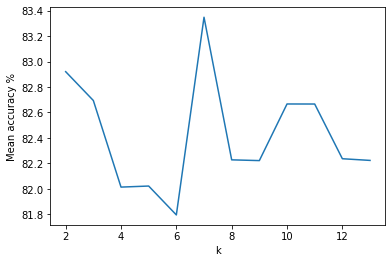

In [ ]:
pipe_GradBoost=Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
('scaler',StandardScaler()),
('Gradient_Boost_Classifier',GradientBoostingClassifier(random_state=31))])
pipe_GradBoost.fit(X_train,y_train)

k = list(range(2,14))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_GradBoost, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

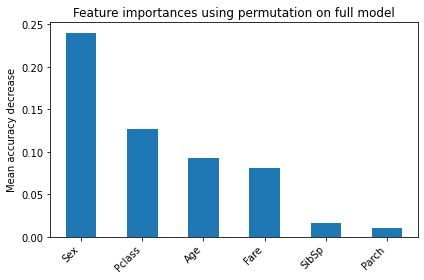

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipe_GradBoost.named_steps['Gradient_Boost_Classifier'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_GradBoost, X_train, y_train, cv=2)
print("Highest accuracy for Gradient Boost",HIGH_score.mean())
# 0.8292025209065568 (no matter what random state I put for the training set)

Highest accuracy for Gradient Boost 0.8292025209065568


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Ada Booster

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

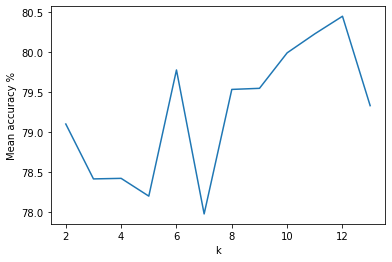

In [ ]:
pipe_AdaBoost=Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
('scaler',StandardScaler()),
('AdaBoost_Classifier',AdaBoostClassifier(random_state=42))])
pipe_AdaBoost.fit(X_train,y_train)

k = list(range(2,14))
mean_accuracy = []

for i in k:
  scores = cross_val_score(pipe_AdaBoost, X_train, y_train, cv=i)
  mean_accuracy.append(scores.mean())

k_df = pd.DataFrame(k)
k_df.rename({0:'k'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['k'], to_plot['mean accuracy'])
plt.xlabel('k')
plt.ylabel('Mean accuracy %')
plt.show()

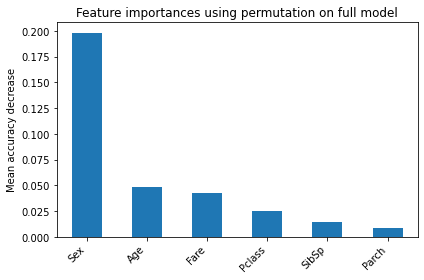

In [ ]:
Impute = SimpleImputer(missing_values=np.nan, strategy='mean')
Scale = StandardScaler()

X_train_I = Impute.fit_transform(X_train)
X_train_S = Scale.fit_transform(X_train_I)

result = permutation_importance(pipe_AdaBoost.named_steps['AdaBoost_Classifier'], X_train_S, y_train, random_state=42)
permutation_importances = pd.Series(result.importances_mean, index=X.columns)
permutation_importances.sort_values(inplace=True,ascending=False)

fig, ax = plt.subplots()
permutation_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.xticks(rotation=45, ha='right')
fig.tight_layout()
plt.show()

In [ ]:
HIGH_score = cross_val_score(pipe_AdaBoost, X_train, y_train, cv=12)
print("Highest accuracy for Random Forests",HIGH_score.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Highest accuracy for Random Forests 0.8045282124229495


# Step 8: Evaluate Your Best Model

Evaluate your best model using the test set.

*   Which model fit the data best?
*   What was the best accuracy you were able to achieve?  

**Note**: Use comments in your code and text blocks to explain your decisions and results.

In [ ]:
# Step 8

# The Gradient Boost Classifier, with StandardScaling and 7-fold Cross Validation, achieved an
# accuracy 0.8334750566893423 for the training data, higher than the 2-fold Cross Validation, but
# it overfits more than the 2-fold (see Step 9). I also picked random state being 31 since it
# achieves the highest accuracy.
pipe_GradBoost_test=Pipeline([('simple_imputer',SimpleImputer(missing_values=np.nan,strategy='mean')),
('scaler',	StandardScaler()),
('Gradient_Boost_Classifier',GradientBoostingClassifier(random_state=31))])
pipe_GradBoost_test.fit(X_test, y_test)
GradBoost_test_scores = cross_val_score(pipe_GradBoost_test, X_test, y_test, cv=2)
GradBoost_test_cv_accuracy = GradBoost_test_scores.mean()
print(GradBoost_test_cv_accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8250080437580438


#Step 9: Final Reporting

Summarize your model building process:  
* How did you identify the model target and features?  
* What steps did you take to prepare the data for modeling?  
* Which baseline model did you choose and why? How did you evaluate the model's performance?  
* Which other model(s) did you choose and why? How did you evaluate the model's performace?  
* What was the best model you developed? How well did the model perform on the test data?

#Step 9:

In [ ]:
#Step 9

# The main interest is to predict which people have survived, so the 'Survived' feature is the target.
# I imported the necessary libraries, data wrangled the dataset (selected which features are necessary),
# split it into training, test, and validation sets, imputed missing values and encoded non numeric values,
# establish a model with a given scalar and tested several k-fold Cross-Validations, calculated each accuracies,
# and then I use different models and different scalars, and lastly use the model with the highest accuracy on the
# test set. After redoing the steps with different scalings and k-folds, I found the Gradient Boost Classifier,
# with StandardScaling and 7-fold Cross Validation achieving the highest accuracy at this point for the
# training set, but it has a score lesser than 0.8, which may be a sign of an overfitting model. I tried all
# models possible from the lectures. Since the accuracy scores for the training set and the test set differ by
# less than 0.01 (or 1%) for the 2-fold Cross-validation with random state being 31, it is a more suitable model
# for predicting survivors and thus the most reliable model for me to make predictions. It achieved a score of
# 0.8334750566893423 (about 83.3%) for the training data and a score of 0.8250080437580438 (about 82.5%) on the
# test set.